In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [2]:
def read_table(filename,keyword='ciclo',rescale=1):
    t0 = 2
    t1 = 7
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=int)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names,dtype=int))

In [3]:
dates = []
for year in range(1987,2022):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

In [4]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']

stocks_mothers = read_table(path+'stocks_mothers_w.log',rescale=100)
stocks_mothers['dates'] = stocks_mothers.index.map(date_dict)
# Rescale
stocks_mothers['Total'] = stocks_mothers[states].sum(axis=1)
for s in states:
    stocks_mothers[s] = stocks_mothers[s]/stocks_mothers['Total']

stocks_fathers = read_table(path+'stocks_fathers_w.log',rescale=100)
stocks_fathers['dates'] = stocks_fathers.index.map(date_dict)
# Rescale
stocks_fathers['Total'] = stocks_fathers[states].sum(axis=1)
for s in states:
    stocks_fathers[s] = stocks_fathers[s]/stocks_fathers['Total']

In [5]:
stocks_not_mothers = read_table(path+'stocks_not_mothers_w.log',rescale=100)
stocks_not_mothers['dates'] = stocks_not_mothers.index.map(date_dict)
# Rescale
stocks_not_mothers['Total'] = stocks_not_mothers[states].sum(axis=1)
for s in states:
    stocks_not_mothers[s] = stocks_not_mothers[s]/stocks_not_mothers['Total']

stocks_not_fathers = read_table(path+'stocks_not_fathers_w.log',rescale=100)
stocks_not_fathers['dates'] = stocks_not_fathers.index.map(date_dict)
# Rescale
stocks_not_fathers['Total'] = stocks_not_fathers[states].sum(axis=1)
for s in states:
    stocks_not_fathers[s] = stocks_not_fathers[s]/stocks_not_fathers['Total']

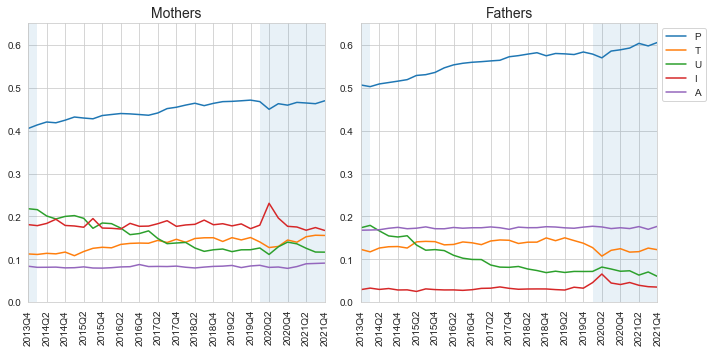

In [87]:
t0 = '2013Q4'
states = ['P','T','U','I','A']
colors = sn.color_palette()
T = stocks_mothers['dates'].size-1
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Mothers',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_mothers['dates'],stocks_mothers[s],c=c,label=s)
    
plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q4']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)

plt.xticks(stocks_fathers['dates'][::2],rotation=90)
plt.xlim(0,T)
plt.ylim(0,0.65)
# plt.legend(ncol=5,bbox_to_anchor=(0.7,-0.2))

plt.subplot(122)
plt.title('Fathers',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_fathers['dates'],stocks_fathers[s],c=c,label=s)
    
plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q4']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)

plt.xticks(stocks_fathers['dates'][::2],rotation=90)
plt.xlim(0,T)
plt.ylim(0,0.65)
plt.legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig('./plots/stocks_spain_parents.pdf',format='pdf',bbox_inches='tight') #,pil_kwargs={'quality':95}
plt.show()

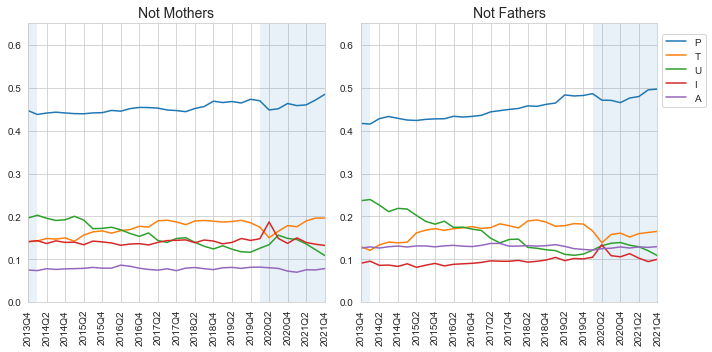

In [88]:
t0 = '2013Q4'
states = ['P','T','U','I','A']
colors = sn.color_palette()
T = stocks_not_mothers['dates'].size-1
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Not Mothers',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_not_mothers['dates'],stocks_not_mothers[s],c=c,label=s)
    
plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q4']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)

plt.xticks(stocks_not_fathers['dates'][::2],rotation=90)
plt.xlim(0,T)
plt.ylim(0,0.65)
# plt.legend(ncol=5,bbox_to_anchor=(0.7,-0.2))

plt.subplot(122)
plt.title('Not Fathers',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_not_fathers['dates'],stocks_not_fathers[s],c=c,label=s)
    
plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q4']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)

plt.xticks(stocks_not_fathers['dates'][::2],rotation=90)
plt.xlim(0,T)
plt.ylim(0,0.65)
plt.legend(bbox_to_anchor=(1,0.98))

plt.tight_layout()
plt.savefig('./plots/stocks_spain_nonparents.pdf',format='pdf',bbox_inches='tight') #,pil_kwargs={'quality':95}
plt.show()

In [7]:
date_cuts_20_m = np.vstack((['2014Q1',],['2021Q4',]))
t0 = date_dict_reverse_ciclo[date_cuts_20_m[0].item()]
states = ['P','T','U','I','A']

stocks_mothers_detrend = {}
stocks_fathers_detrend = {}
for st in states:
    trend, predict = detrend_fuction(stocks_mothers,st,date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
    stocks_mothers_detrend[st] = stocks_mothers[st].loc[t0:] - predict
    
    trend, predict = detrend_fuction(stocks_fathers,st,date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
    stocks_fathers_detrend[st] = stocks_fathers[st].loc[t0:] - predict
    
stocks_not_mothers_detrend = {}
stocks_not_fathers_detrend = {}
for st in states:
    trend, predict = detrend_fuction(stocks_not_mothers,st,date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
    stocks_not_mothers_detrend[st] = stocks_not_mothers[st].loc[t0:] - predict
    
    trend, predict = detrend_fuction(stocks_not_fathers,st,date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
    stocks_not_fathers_detrend[st] = stocks_not_fathers[st].loc[t0:] - predict

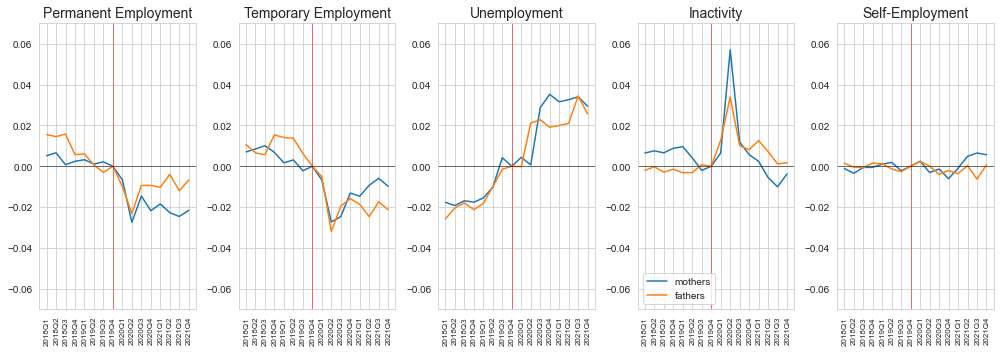

In [10]:
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,5))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_mothers['dates'].loc[t0:],
             stocks_mothers_detrend[s].loc[t0:]-stocks_mothers_detrend[s].loc[t19],label='mothers')
    plt.plot(stocks_fathers['dates'].loc[t0:],
             stocks_fathers_detrend[s].loc[t0:]-stocks_fathers_detrend[s].loc[t19],label='fathers')

    plt.ylim(-0.07,0.07)
    plt.xticks(rotation=90,fontsize=8)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==3:
        plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_mothersVsfathers.pdf',format='pdf',bbox_inches='tight')
plt.show()

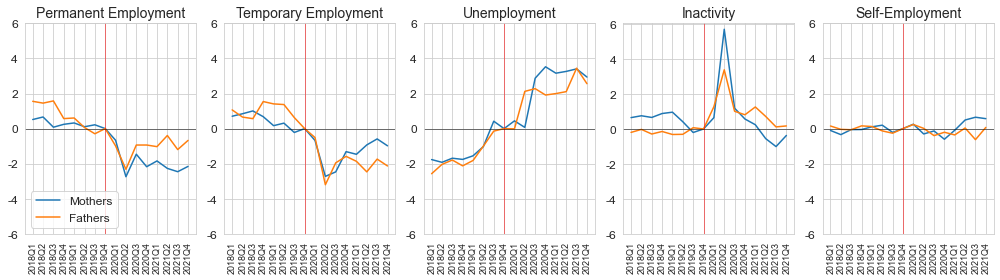

In [31]:
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,4))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_mothers['dates'].loc[t0:],
             stocks_mothers_detrend[s].loc[t0:]-stocks_mothers_detrend[s].loc[t19],label='Mothers')
    plt.plot(stocks_fathers['dates'].loc[t0:],
             stocks_fathers_detrend[s].loc[t0:]-stocks_fathers_detrend[s].loc[t19],label='Fathers')

    plt.yticks(np.arange(-0.06,0.07,0.02),np.arange(-6,8,2),fontsize=12)
    plt.xticks(rotation=90,fontsize=9)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==0:
        plt.legend(loc='lower left',fontsize=12)

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_mothersVsfathers.pdf',format='pdf',bbox_inches='tight')
plt.show()

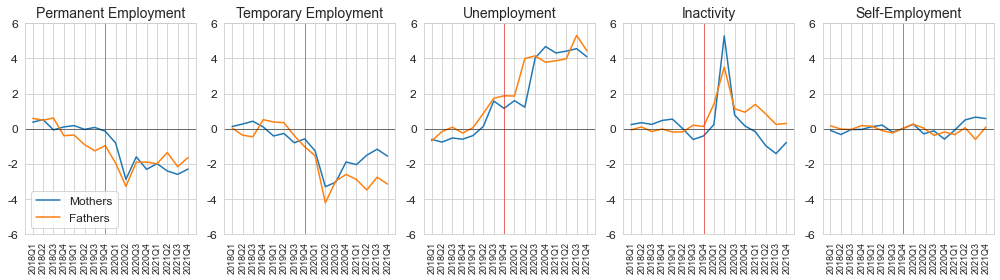

In [43]:
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,4))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_mothers['dates'].loc[t0:],
             stocks_mothers_detrend[s].loc[t0:],label='Mothers')
    plt.plot(stocks_fathers['dates'].loc[t0:],
             stocks_fathers_detrend[s].loc[t0:],label='Fathers')

    plt.yticks(np.arange(-0.06,0.07,0.02),np.arange(-6,8,2),fontsize=12)
    plt.xticks(rotation=90,fontsize=9)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==0:
        plt.legend(loc='lower left',fontsize=12)

plt.tight_layout()
# plt.savefig('./plots/spain_stocks_detrend_mothersVsfathers.pdf',format='pdf',bbox_inches='tight')
plt.show()

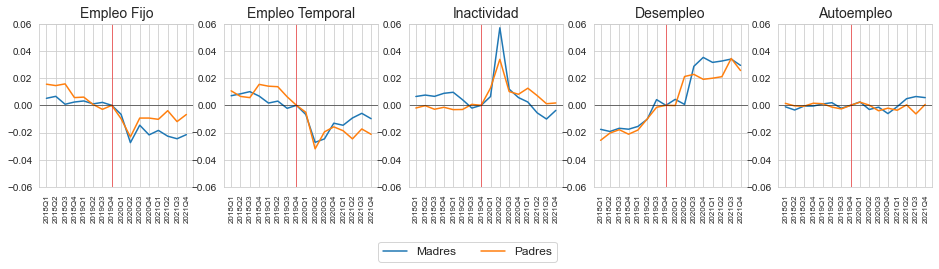

In [23]:
states = ['P','T','I','U','A']
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Empleo Fijo','Empleo Temporal','Inactividad','Desempleo','Autoempleo']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(16,3))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_mothers['dates'].loc[t0:],
             stocks_mothers_detrend[s].loc[t0:]-stocks_mothers_detrend[s].loc[t19],label='Madres')
    plt.plot(stocks_fathers['dates'].loc[t0:],
             stocks_fathers_detrend[s].loc[t0:]-stocks_fathers_detrend[s].loc[t19],label='Padres')

    plt.ylim(-0.06,0.06)
    plt.xticks(rotation=90,fontsize=8)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==3:
        plt.legend(ncol=2, loc='best',bbox_to_anchor=(-0.2,-0.3),fontsize=12)

# plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_mothersVsfathers.png',format='png',bbox_inches='tight')
plt.show()

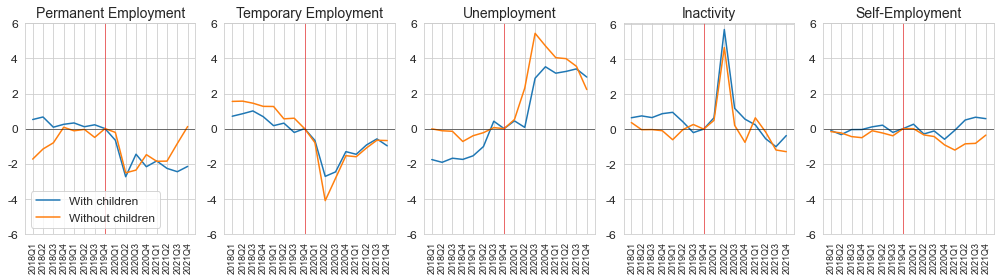

In [35]:
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,4))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_mothers['dates'].loc[t0:],
             stocks_mothers_detrend[s].loc[t0:]-stocks_mothers_detrend[s].loc[t19],label='With children')
    plt.plot(stocks_not_mothers['dates'].loc[t0:],
             stocks_not_mothers_detrend[s].loc[t0:]-stocks_not_mothers_detrend[s].loc[t19],label='Without children')

    plt.yticks(np.arange(-0.06,0.07,0.02),np.arange(-6,8,2),fontsize=12)
    plt.xticks(rotation=90,fontsize=9)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==0:
        plt.legend(loc='lower left',fontsize=12)

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_mothers.pdf',format='pdf',bbox_inches='tight')
plt.show()

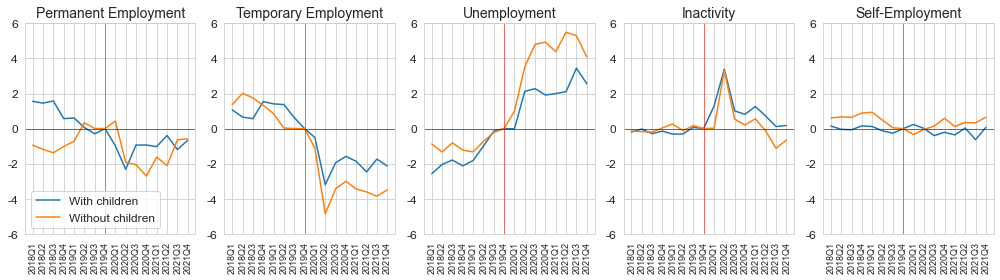

In [37]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,4))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(stocks_fathers['dates'].loc[t0:],
             stocks_fathers_detrend[s].loc[t0:]-stocks_fathers_detrend[s].loc[t19],label='With children')
    plt.plot(stocks_not_fathers['dates'].loc[t0:],
             stocks_not_fathers_detrend[s].loc[t0:]-stocks_not_fathers_detrend[s].loc[t19],label='Without children')

    plt.yticks(np.arange(-0.06,0.07,0.02),np.arange(-6,8,2),fontsize=12)
    plt.xticks(rotation=90,fontsize=9)
    plt.axvline(dt_boom,c='r',lw=0.5)
    plt.axhline(c='k',lw=0.5)
    if j==0:
        plt.legend(loc='lower left',fontsize=12)

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_fathers.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [67]:
sn.color_palette()[:4]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

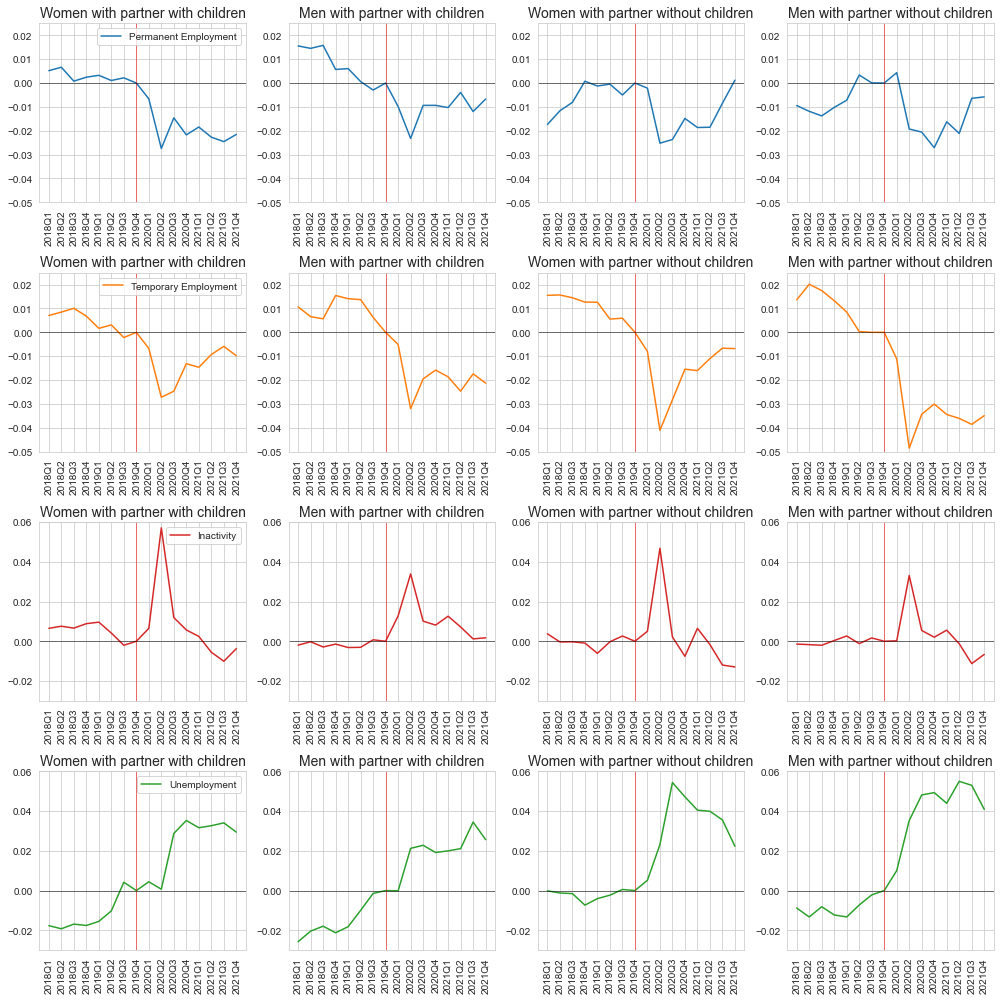

In [72]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q1']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])

states = ['P','T','I',"U"]
series = [stocks_mothers_detrend,stocks_fathers_detrend,stocks_not_mothers_detrend,stocks_not_fathers_detrend]

color_dict = dict(zip(['P','T',"U",'I',"A"],sn.color_palette()[:5]))
labels = ['Permanent Employment','Temporary Employment','Inactivity','Unemployment']
labels_st = ['Women with partner with children','Men with partner with children',
             'Women with partner without children','Men with partner without children']

lims = [(-0.05,0.025),(-0.05,0.025),(-0.03,0.06),(-0.03,0.06)]
plt.figure(figsize=(14,14))

for j,s in enumerate(states):
    for i,ser in enumerate(series):
        plt.subplot(4,4,(i+1)+j*4)
        plt.title(labels_st[i],fontsize=14)
        plt.plot(stocks_mothers['dates'].loc[t0:],ser[s].loc[t0:]-ser[s].loc[t19],
                 label=labels[j],c=color_dict[s])

        plt.ylim(lims[j])
        plt.xticks(rotation=90)
        if i==0:
            plt.legend()
        plt.axvline(dt_boom,c='r',lw=0.5)
        plt.axhline(c='k',lw=0.5)

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_partner.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Conditioning on ERTE

In [15]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']

stocks_mothers_fe = read_table(path+'stocks_mothers_fatherERTE_w.log',rescale=100)
stocks_mothers_fe['dates'] = stocks_mothers_fe.index.map(date_dict)
# Rescale
stocks_mothers_fe['Total'] = stocks_mothers_fe[states].sum(axis=1)
for s in states:
    stocks_mothers_fe[s] = stocks_mothers_fe[s]/stocks_mothers_fe['Total']

stocks_mothers_fne = read_table(path+'stocks_mothers_fatherNoERTE_w.log',rescale=100)
stocks_mothers_fne['dates'] = stocks_mothers_fne.index.map(date_dict)
# Rescale
stocks_mothers_fne['Total'] = stocks_mothers_fne[states].sum(axis=1)
for s in states:
    stocks_mothers_fne[s] = stocks_mothers_fne[s]/stocks_mothers_fne['Total']

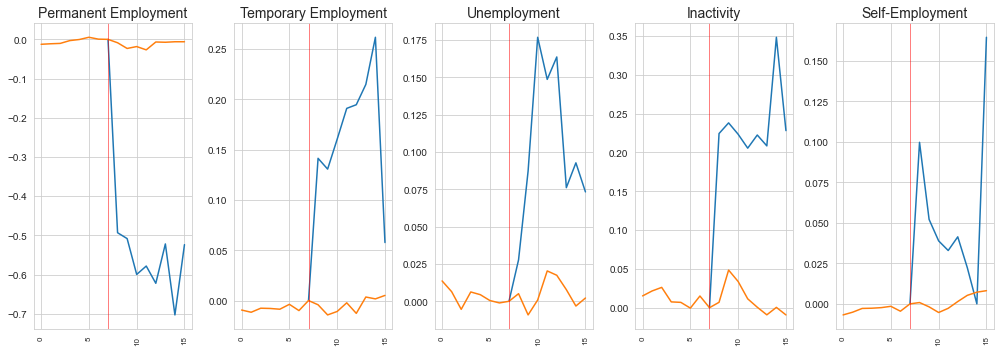

In [52]:
t0 = date_dict_reverse_ciclo['2018Q1']
t19 = date_dict_reverse_ciclo['2019Q4']
tbase = t19-t0
T = date_dict_reverse_ciclo['2021Q4']-t0
T19 = date_dict_reverse_ciclo['2021Q4']-t19
# dt_boom = T - (date_dict_reverse_ciclo['2021Q4']-date_dict_reverse_ciclo['2019Q4'])
# dt_bot = T - (date_dict_reverse_ciclo['2021Q4']-t19)
colors = sn.color_palette()

labels = ['Permanent Employment','Temporary Employment','Unemployment','Inactivity','Self-Employment']
labels_st = ['Mothers','Fathers']
# lims = [(-120000,60000),(-60000,140000),(-175000,25000),(-25000,150000)]

plt.figure(figsize=(14,5))
    
for j,s in enumerate(states):
    plt.subplot(1,5,(j+1))
    plt.title(labels[j],fontsize=14)
    plt.plot(range(tbase,T19+1+tbase),
             stocks_mothers_fe[s].loc[t19:]-stocks_mothers_fe[s].loc[t19],label='mothers')
    plt.plot(range(T+1),
             stocks_mothers_fne[s].loc[t0:]-stocks_mothers_fne[s].loc[t19],label='not mothers')

#     plt.ylim(-0.07,0.07)
    plt.xticks(rotation=90,fontsize=8)
    plt.axvline(dt_boom,c='r',lw=0.5)
#     plt.axhline(c='k',lw=0.5)
#     if j==3:
#         plt.legend(loc='lower left')

plt.tight_layout()
# plt.savefig('./plots/spain_stocks_detrend_mothers_fe.pdf',format='pdf',bbox_inches='tight')
plt.show()

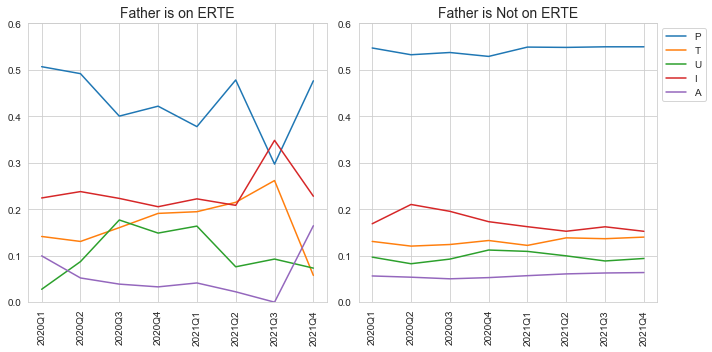

In [125]:
t0 = date_dict_reverse_ciclo['2020Q1']
states = ['P','T','U','I','A']
colors = sn.color_palette()
T = stocks_mothers['dates'].size-1
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Father is on ERTE',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_mothers_fe['dates'].loc[t0:],stocks_mothers_fe[s].loc[t0:],c=c,label=s)
    
plt.xticks(stocks_fathers['dates'].loc[t0:],rotation=90)
# plt.xlim(0,T)
plt.ylim(0,0.6)
# plt.legend(ncol=5,bbox_to_anchor=(0.7,-0.2))

plt.subplot(122)
plt.title('Father is Not on ERTE',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_mothers_fne['dates'].loc[t0:],stocks_mothers_fne[s].loc[t0:],c=c,label=s)
    

plt.xticks(stocks_fathers['dates'].loc[t0:],rotation=90)
# plt.xlim(0,T)
plt.ylim(0,0.6)
plt.legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig('./plots/stocks_spain_mothers_erte.pdf',format='pdf',bbox_inches='tight') #,pil_kwargs={'quality':95}
plt.show()

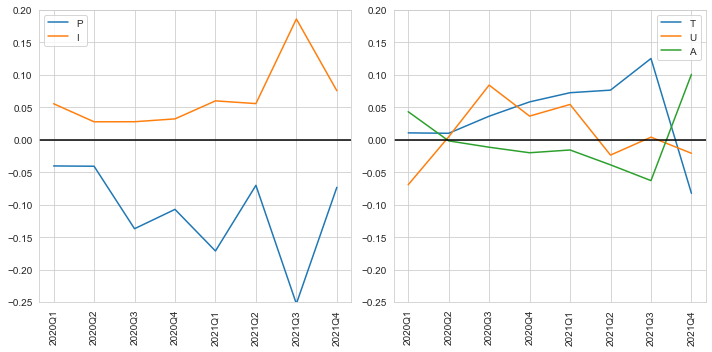

In [127]:
t0 = date_dict_reverse_ciclo['2020Q1']
states = ['P','I']
colors = sn.color_palette()
T = stocks_mothers['dates'].size-1
plt.figure(figsize=(10,5))

plt.subplot(121)
# plt.title('Mothers, father in ERTE - father not in ERTE',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_mothers_fe['dates'].loc[t0:],
             stocks_mothers_fe[s].loc[t0:]-stocks_mothers_fne[s].loc[t0:],c=c,label=s)
    
plt.xticks(stocks_fathers['dates'].loc[t0:],rotation=90)
# plt.xlim(0,T)
plt.ylim(-0.25,0.2)
plt.axhline(c='k')
plt.legend()

states = ['T','U','A']
plt.subplot(122)
# plt.title('Mothers, father in ERTE - father not in ERTE',fontsize=14)
for s,c in zip(states,colors):
    plt.plot(stocks_mothers_fe['dates'].loc[t0:],
             stocks_mothers_fe[s].loc[t0:]-stocks_mothers_fne[s].loc[t0:],c=c,label=s)
    
plt.xticks(stocks_fathers['dates'].loc[t0:],rotation=90)
# plt.xlim(0,T)
plt.ylim(-0.25,0.2)
plt.axhline(c='k')
plt.legend()

plt.tight_layout()
plt.savefig('./plots/stocks_spain_mothers_erte_diff.pdf',format='pdf',bbox_inches='tight') #,pil_kwargs={'quality':95}
plt.show()

In [ ]:
        185 |    159,896        8.30        8.30
        186 |    161,443        8.38       16.68
        187 |    161,211        8.37       25.04
        188 |    160,279        8.32       33.36
        189 |    159,827        8.29       41.66
        190 |    155,568        8.07       49.73
        191 |    145,393        7.55       57.28
        192 |    144,634        7.51       64.78
        193 |    144,586        7.50       72.29
        194 |    140,354        7.28       79.57
        195 |    135,016        7.01       86.58
        196 |    128,940        6.69       93.27
        197 |    129,655        6.73      100.00


In [ ]:
159896